## The Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from keras.datasets import mnist

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

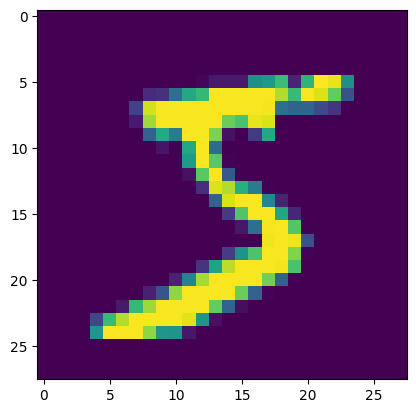

In [19]:
plt.imshow(X_train[0])

In [20]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Reshape
from keras.optimizers import SGD

In [22]:
783/2

391.5

In [23]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [24]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [25]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [26]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2485 - accuracy: 0.0911 - val_loss: 0.1999 - val_accuracy: 0.1466
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1830 - accuracy: 0.1682 - val_loss: 0.1673 - val_accuracy: 0.1849
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1593 - accuracy: 0.1950 - val_loss: 0.1539 - val_accuracy: 0.2093
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1464 - accuracy: 0.2136 - val_loss: 0.1398 - val_accuracy: 0.2170
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1390 - accuracy: 0.2248 - val_loss: 0.1356 - val_accuracy: 0.2221


In [27]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 119ms/step


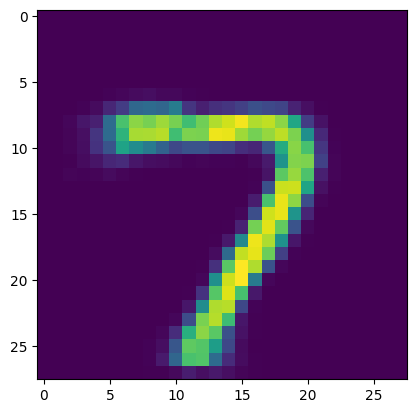

In [28]:
plt.imshow(passed_images[0])

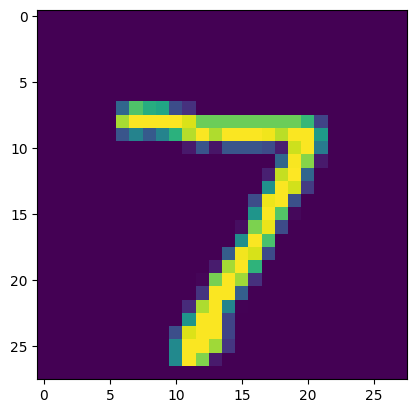

In [29]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [30]:
from tensorflow.keras.layers import GaussianNoise

In [31]:
sample = GaussianNoise(0.2)

In [32]:
noisey = sample(X_test[0:2],training=True)

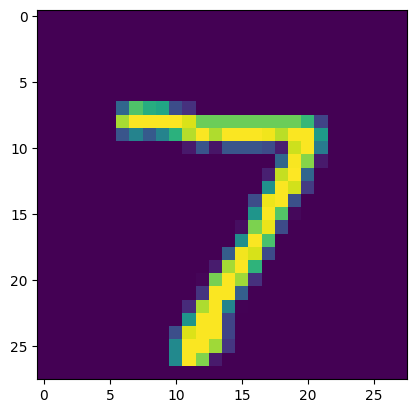

In [33]:
plt.imshow(X_test[0])

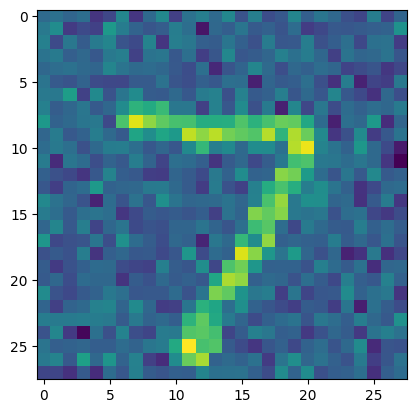

In [34]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [35]:
import tensorflow as tf
import numpy as np

In [36]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [37]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [38]:
noise_remover = Sequential([encoder, decoder])

In [39]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [40]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1772 - accuracy: 0.1731 - val_loss: 0.1385 - val_accuracy: 0.2248
Epoch 2/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1333 - accuracy: 0.2290 - val_loss: 0.1254 - val_accuracy: 0.2318
Epoch 3/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1254 - accuracy: 0.2405 - val_loss: 0.1199 - val_accuracy: 0.2427
Epoch 4/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1214 - accuracy: 0.2469 - val_loss: 0.1160 - val_accuracy: 0.2543
Epoch 5/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1178 - accuracy: 0.2530 - val_loss: 0.1134 - val_accuracy: 0.2554
Epoch 6/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1148 - accuracy: 0.2584 - val_loss: 0.1109 - val_accuracy: 0.2599
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1125 - accuracy: 0.2620 - val_loss: 0.1087 - val_accuracy:

In [41]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


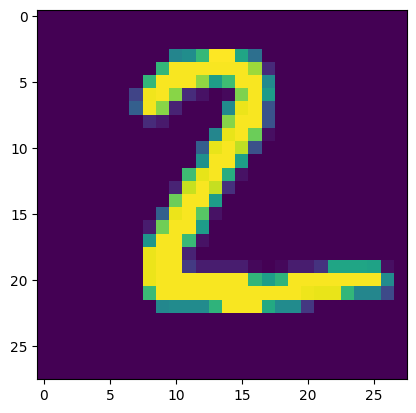

The Noisey Version


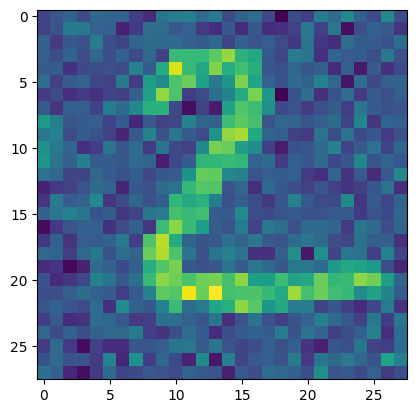

After going through denoiser


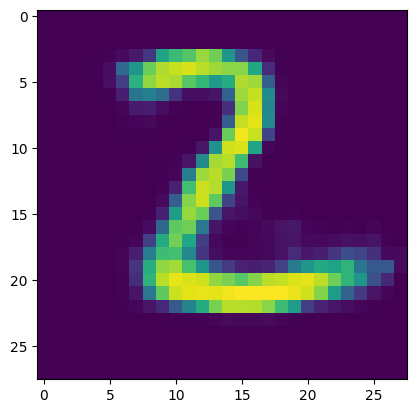

In [42]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()